# Wrangle and Analyze WeRateDogs Data

### Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gathering">Gathering Data</a></li>
    <li><a href="#assessing">Assessing Data</a></li>
        <ul>
          <li><a href="#issues">Identified Issues</a></li>
        </ul>
    <li><a href="#cleaning">Cleaning Data</a></li>
    </ul>
<li><a href="#sav">Store, Analyze and Visualize</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

"The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage."

#### Import

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns
# To see all columns in datasets in order to help visual assessment
pd.set_option('display.max_columns', 100)

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check it for cleanliness, and then trim and clean the datasets for analysis. 

<a id='gathering'></a>
### Gathering Data

#### Enhanced WeRateDogs Twitter Archive 

In [3]:
# Read in the dataset
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')

#### Dog Breed Prediction Based Off of Images

In [4]:
# Create folder if it doesn't already exist
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
# Load dataset and check response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.status_code

200

In [6]:
# Add data to folder
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Read in tsv as csv
predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')

#### WeRateDogs Twitter Archieve via API

In [8]:
# # API Keys, Secrets, and Tokens
# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

In [9]:
# # Redirect to Twitter and get access token
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# # API instance
# # guidance for this was found here: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
# api = tweepy.API(auth_handler=auth, 
#                  wait_on_rate_limit=True, 
#                  wait_on_rate_limit_notify=True)


In [10]:
# # Twitter API

# # Split into working tweets list and list of tweets with errors
# tweets = []
# errors = []

# tweet_ids = list(enhanced_df['tweet_id'])

# with open('tweet_json.txt', 'w') as file:
#     for tweet_id in tweet_ids:
#         try:
#             # Get extended tweet information via the id
#             extended_tweet = api.get_status(tweet_id, tweet_mode='extended')
#             json.dump(extended_tweet._json, file)
#             file.write('\n')
            
#             # Add to working tweets list
#             tweets.append(tweet_id)
#             print(tweet_id)
        
#         # Support used to better understand TweepError: https://www.programcreek.com/python/example/13279/tweepy.TweepError
#         except tweepy.TweepError as e:
            
#             # Add to list of tweets with errors
#             errors.append(tweet_id)
#             print(tweet_id, e)

In [11]:
# Read in JSON 
tweet_df = pd.read_json('tweet_json.txt', lines = True, encoding = 'utf-8')

<a id='assessing'></a>
### Assessing Data

In this section, we will visually and programmatically assess the 3 datasets to determine whether or not they hold any quality or tidiness issues.

#### Enhanced twitter dataframe assessment

In [12]:
# Overview of all the data
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
# See amount of data within each column, how many rows exist, and the datatypes
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Check if texts are robust
enhanced_df.text[400]

'This is Scooter. His lack of opposable thumbs is rendering his resistance to tickling embarrassingly moot. 12/10 would keep tickling https://t.co/F0VWg2GztI'

In [15]:
# See how many images are missing
enhanced_df.expanded_urls.isnull().sum()

59

In [16]:
# See how many images are duplicated
enhanced_df.expanded_urls.duplicated().sum()

137

In [17]:
# Find missing data
enhanced_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Find number of retweets
enhanced_df.retweeted_status_id.notna().sum()

181

In [19]:
# Look at dog names to ensure they are real names
enhanced_df.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Oliver           11
Cooper           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Daisy             7
Bailey            7
an                7
Toby              7
Buddy             7
Leo               6
Koda              6
Bella             6
Scout             6
Rusty             6
Oscar             6
Milo              6
Stanley           6
Dave              6
Jack              6
Jax               6
Chester           5
               ... 
Erik              1
Staniel           1
Thor              1
Hero              1
Nugget            1
Shadoe            1
Bauer             1
Tito              1
Cora              1
Eleanor           1
Sparky            1
Shelby            1
Dewey             1
Vince             1
Iggy              1
such              1
Kial              1
Tuco              1
Jebberson         1


In [20]:
# How many doggos are there
enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
# How many floofers are there
enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
# How many puppers are there
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
# How many puppos are there
enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

#### Predicted dog type assessment

In [24]:
# Overview of all the data
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [25]:
# See amount of data within each column, how many rows exist, and the datatypes
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
predictions_df.p1.str.islower().sum()

1135

In [27]:
predictions_df.jpg_url.duplicated().sum()

66

In [28]:
predictions_df.tweet_id.duplicated().sum()

0

In [29]:
predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
beagle                        18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

#### Twitter API data assessment

In [30]:
# Overview of all the data
tweet_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37684,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8215,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32373,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6076,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24378,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,4017,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41005,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8370,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39209,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,9075,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19710,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,3010,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11525,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,1989,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63574,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,18247,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'

In [31]:
# See amount of data within each column, how many rows exist, and the datatypes
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [32]:
# Check for missing values
tweet_df.isnull().sum()

contributors                     2339
coordinates                      2339
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 274
favorite_count                      0
favorited                           0
full_text                           0
geo                              2339
id                                  0
id_str                              0
in_reply_to_screen_name          2262
in_reply_to_status_id            2262
in_reply_to_status_id_str        2262
in_reply_to_user_id              2262
in_reply_to_user_id_str          2262
is_quote_status                     0
lang                                0
place                            2338
possibly_sensitive                136
possibly_sensitive_appealable     136
quoted_status                    2315
quoted_status_id                 2313
quoted_status_id_str             2313
quoted_status_permalink          2313
retweet_coun

In [33]:
tweet_df.id.duplicated().sum()

0

<a id='issues'></a>
### Identified Issues

#### Quality Issues

##### `enhanced_df` table:
- Retweet information is not needed, so items that are not NaN in `retweet_status_id` can be removed
- Irrelevant columns since we only want to look at original ratings (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- Missing photo URLs for tweets (`expanded_url`) 
- Erroneous datatype (`timestamp` and `retweeted_status_timestamp` are strings) 
- Erroneous dog names ('a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially' and None are not real names)
- Duplicated rows after melting
- Since the denominators are not always 10, we should normalize the rating

##### `predictions_df` table:
- About half of `p1`, `p2`, and `p3` are not capitalized
- Duplicated images/rows

##### `tweet_df` table:
- Missing data for entire column (`contributors`,`coordinates`,`geo`)
- Missing data for almost entire column (`in_reply_to_screen_name`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`place`,`quoted_status`, `quoted_status_id`,`quoted_status_id_str`, `quoted_status_permalink`, `retweeted_status`)
- Column name not clear(`id` should be `tweet_id` to match the other tables)

#### Tidiness Issues
- Single variable `dog_stage` split up into four columns in `enhanced_df` table
- All tables can be combined into one on `tweet_id`

<a id='cleaning'></a>
### Cleaning Data

In this section, we will target the quality and tidiness issues were identified in the previous section, and we will define these issues in more depth, code the solution, and test to ensure proper functionality. 

Before we begin, we should create copies of our dataframes in order to not alter the originals.

In [34]:
# Create copies
enhanced_df_clean = enhanced_df.copy()
predictions_df_clean = predictions_df.copy()
tweet_df_clean = tweet_df.copy()

### Clean `enhanced_df_clean` table

#### Retweet information is not needed, so items that are not NaN in `retweet_status_id` can be removed
##### Define
Change the datatype of column to string since it is easier to query strings than deal with floats. Then, create a new dataframe with all of the 'nan' values, which indicate that they are not retweets. 

##### Code

In [35]:
# Change `retweeted_status_id` into a string datatype
enhanced_df_clean.retweeted_status_id = enhanced_df_clean.retweeted_status_id.astype('str')

In [36]:
# Update dataframe with just the nan values
enhanced_df_clean = enhanced_df_clean[(enhanced_df_clean.retweeted_status_id == 'nan')]

##### Test

In [37]:
# Check to see if there are any retweets left
enhanced_df_clean.retweeted_status_id.value_counts()

nan    2175
Name: retweeted_status_id, dtype: int64

#### Irrelevant columns since we only want to look at original ratings (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
##### Define
Now that the retweeted dog ratings are removed, we can drop all retweet related columns.

##### Code

In [38]:
# Drop all irrelevant columns
enhanced_df_clean.drop(columns=[
    'in_reply_to_status_id', 
    'in_reply_to_user_id', 
    'retweeted_status_id', 
    'retweeted_status_user_id', 
    'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [39]:
# Check the columns remaining
list(enhanced_df_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Missing photo URLs for tweets (`expanded_urls`) in the `enhanced_df` table
##### Define
Since we only want original ratings that have images, the tweets that are missing photo URLs will be dropped. 

##### Code

In [40]:
enhanced_df_clean.expanded_urls.dropna(inplace=True)

##### Test

In [41]:
enhanced_df_clean.expanded_urls.isnull().sum()

0

#### Erroneous datatype (`timestamp` and `retweeted_status_timestamp` are strings) in the `enhanced_df` table

##### Define
The datatype of `timestamp` and `retweeted_status_timestamp` in the `enhanced_df` table are strings but it should be datetime. Since `retweeted_status_timestamp` has already been dropped, we can change the datatype of just `timestamp` to datetime.

##### Code

In [42]:
# Datatime information found here: https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime
enhanced_df_clean.timestamp = enhanced_df_clean.timestamp.astype('datetime64')

##### Test

In [43]:
# Check the datatypes
enhanced_df_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Erroneous dog names ('a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially', and None are not real names) in the `enhanced_df` table

##### Define
Since 'a', 'an', 'the', 'such', 'his', 'quite' etc. and None are not names, we should preferably replace these with NaN as to not lead to confusion, and to identify that the name is not provided.

##### Code

In [44]:
# https://stackoverflow.com/questions/17097236/replace-invalid-values-with-none-in-pandas-dataframe
enhanced_df_clean.name.replace(['a', 'an', 'the', 'his', 'such', 'just', 'very', 'one', 'not', 'mad', 'this', 'all','my', 'light', 'by', 'old', 'space', 'officially','None'], np.nan, inplace=True)

##### Test

In [45]:
# Check to see if invalid names are still present
enhanced_df_clean.name.value_counts()

Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Sadie           8
Lola            8
Daisy           7
Toby            7
Oscar           6
Jax             6
Koda            6
Bailey          6
Stanley         6
Bo              6
Bella           6
Louis           5
Leo             5
Buddy           5
Chester         5
Milo            5
Dave            5
Bentley         5
Rusty           5
Scout           5
George          4
Reggie          4
Archie          4
               ..
Crawford        1
incredibly      1
Napolean        1
Smiley          1
Franq           1
Shakespeare     1
Paull           1
Kuyu            1
Shadoe          1
life            1
Bowie           1
infuriating     1
Darla           1
Lugan           1
Kawhi           1
Antony          1
Dante           1
Pipsy           1
Obi             1
Dawn            1
Hero            1
Trip            1
Jim             1
Dudley          1
Juckson   

#### Tidiness: Single variable `dog_stage` split up into four columns in `enhanced_df` table
##### Define
To put all the dog stages into one column, first we will split the `enhanced_df_clean` table into a df with the dog stages and into a df without the dog stages. For the dataframe without dog stages, we will drop all the dog stage columns. For the dataframe with dog stages, we will melt the columns into one with the results. Then we will concatenate the two cleaned dataframes to create the new `enhanced_df_clean`.

##### 1. Code

In [46]:
# Create dataframe without any dog stages
without_stage = enhanced_df_clean[(enhanced_df_clean.doggo == 'None') 
                                  & (enhanced_df_clean.floofer == 'None') 
                                  & (enhanced_df_clean.pupper == 'None') 
                                  & (enhanced_df_clean.puppo == 'None')]

##### Test

In [47]:
# Check to see that none of the rows have any dog stages
without_stage[(without_stage.doggo != 'None') 
                & (without_stage.floofer != 'None') 
                & (without_stage.pupper != 'None') 
                & (without_stage.puppo != 'None')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [48]:
# Check to see the total rows for dogs without a stage
without_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1831 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1831 non-null int64
timestamp             1831 non-null datetime64[ns]
source                1831 non-null object
text                  1831 non-null object
expanded_urls         1779 non-null object
rating_numerator      1831 non-null int64
rating_denominator    1831 non-null int64
name                  1217 non-null object
doggo                 1831 non-null object
floofer               1831 non-null object
pupper                1831 non-null object
puppo                 1831 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 186.0+ KB


##### 2. Code

In [49]:
# Drop the dog stage columns since they now have been checked to ensure nothing is within them
without_stage.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Test

In [50]:
# Check to see if the columns were correctly dropped
without_stage.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin


In [51]:
enhanced_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### 3. Code

In [52]:
# Create a dataframe for all dogs with a stage
with_stage = enhanced_df_clean[(enhanced_df_clean.doggo != 'None') 
                                  | (enhanced_df_clean.floofer != 'None') 
                                  | (enhanced_df_clean.pupper != 'None') 
                                  | (enhanced_df_clean.puppo != 'None')]

##### Test

In [53]:
# Check samples to ensure that each dog has a stage
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1243,711968124745228288,2016-03-21 17:30:03,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's trapped in a cup of coffee....,https://twitter.com/dog_rates/status/711968124...,10,10,Winston,None,None,pupper,None
1825,676470639084101634,2015-12-14 18:35:43,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,https://twitter.com/dog_rates/status/676470639...,11,10,NaN,None,None,pupper,None
1608,685641971164143616,2016-01-09 01:59:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,None,None,pupper,None
1138,728035342121635841,2016-05-05 01:35:26,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,https://twitter.com/dog_rates/status/728035342...,12,10,NaN,None,None,pupper,None
378,827933404142436356,2017-02-04 17:34:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None


##### 4. Code

In [54]:
# Melt the dog stage columns of doggo, floofer, pupper, and puppo into a single column
with_stage = pd.melt(with_stage, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='dog_type', value_name='dog_stage')

##### Test

In [55]:
# Check sample to see the results
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_stage
84,797971864723324932,2016-11-14 01:18:12,"<a href=""http://twitter.com/download/iphone"" r...",Here's a helicopter pupper. He takes off at ra...,https://twitter.com/dog_rates/status/797971864...,12,10,NaN,doggo,None
157,743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,NaN,doggo,None
115,767191397493538821,2016-08-21 02:47:37,"<a href=""http://twitter.com/download/iphone"" r...",I don't know any of the backstory behind this ...,https://twitter.com/dog_rates/status/767191397...,13,10,NaN,doggo,doggo
355,874012996292530176,2017-06-11 21:18:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,floofer,None
908,699434518667751424,2016-02-16 03:25:58,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,https://twitter.com/dog_rates/status/699434518...,12,10,NaN,pupper,pupper


In [56]:
# Check to see if there's repetition with the name since the indices are different
with_stage[(with_stage.name == 'Rinna')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,dog_stage
291,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,doggo,None
635,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,floofer,None
979,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,pupper,pupper
1323,679777920601223168,2015-12-23 21:37:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Rinna. She's melting. 10/10 get inside...,https://twitter.com/dog_rates/status/679777920...,10,10,Rinna,puppo,None


##### 5. Code

In [57]:
# Drop the rows with None since those are just duplicates, and then drop the dog stage
with_stage = with_stage[with_stage.dog_stage != "None"]
with_stage = with_stage.drop('dog_type', axis=1)

##### Test

In [58]:
# Check sample to ensure it worked out
with_stage.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1028,672481316919734272,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,pupper
903,701545186879471618,2016-02-21 23:13:01,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,pupper
924,692905862751522816,2016-01-29 03:03:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's being abducted by aliens. ...,https://twitter.com/dog_rates/status/692905862...,10,10,Wally,pupper
980,679527802031484928,2015-12-23 05:03:47,"<a href=""http://twitter.com/download/iphone"" r...",This little pupper just arrived. 11/10 would s...,https://twitter.com/dog_rates/status/679527802...,11,10,NaN,pupper
999,675845657354215424,2015-12-13 01:12:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,https://twitter.com/dog_rates/status/675845657...,10,10,Pepper,pupper


##### 6. Code

In [59]:
# Concatenate the with and without stage dataframes back into a joined dataframe
enhanced_df_clean = pd.concat([with_stage, without_stage], join='outer', sort=False)

##### Test

In [60]:
# Check to see if it concatenated correctly
enhanced_df_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
25,887101392804085760,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,NaN
878,719704490224398336,2016-04-12 01:51:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,pupper
1087,738156290900254721,2016-06-01 23:52:28,"<a href=""http://twitter.com/download/iphone"" r...",This is Storkson. He's wet and sad. 10/10 chee...,https://twitter.com/dog_rates/status/738156290...,10,10,Storkson,NaN
2082,670815497391357952,2015-11-29 04:04:12,"<a href=""http://twitter.com/download/iphone"" r...",This is Sage. He likes to burn shit. 10/10 htt...,https://twitter.com/dog_rates/status/670815497...,10,10,Sage,NaN
1094,736736130620620800,2016-05-29 01:49:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,NaN
704,785872687017132033,2016-10-11 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. He appears to be rather h*ckin flu...,https://twitter.com/dog_rates/status/785872687...,12,10,Rusty,NaN
757,778624900596654080,2016-09-21 16:00:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,https://twitter.com/dog_rates/status/778624900...,11,10,Penny,NaN
781,775729183532220416,2016-09-13 16:13:44,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,https://twitter.com/dog_rates/status/775729183...,13,10,NaN,NaN
1926,674053186244734976,2015-12-08 02:29:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Yes he is aware of the spoon'...,https://twitter.com/dog_rates/status/674053186...,10,10,Stanley,NaN
419,822244816520155136,2017-01-20 00:50:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,https://twitter.com/dog_rates/status/822244816...,11,10,NaN,NaN


In [61]:
# Check to see if all the dog stages are still present
enhanced_df_clean.dog_stage.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stage, dtype: int64

In [62]:
# The following 4 are to ensure the cleaned dataframes dog stages match the original dataframe
enhanced_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [63]:
enhanced_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [64]:
enhanced_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [65]:
enhanced_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [66]:
enhanced_df_clean.dog_stage.isna().sum()

1831

#### Duplicated rows in `enhanced_df_clean` after melt function applied
##### Define

##### Code

In [67]:
# Create a small DataFrame to assess the duplicates
duplicate_dogs = enhanced_df_clean[enhanced_df_clean.tweet_id.duplicated()]
duplicate_dogs

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
368,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,floofer
751,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,pupper
760,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,pupper
764,802265048156610565,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,pupper
766,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,pupper
782,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,pupper
787,781308096455073793,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,NaN,pupper
809,759793422261743616,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,pupper
822,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,pupper
850,741067306818797568,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,NaN,pupper


In [68]:
# Visually assess the duplicates to see if they can be classified and kept
dog_list = list(duplicate_dogs.index)

for x in dog_list:
    print('>', enhanced_df_clean.tweet_id[x], '-', enhanced_df_clean.text[x], '\n')

> 368    854010172552949760
368    828708714936930305
Name: tweet_id, dtype: int64 - 368    At first I thought this was a shy doggo, but i...
368    This is Fiona. She's an exotic dog. Seems rath...
Name: text, dtype: object 

> 751    817777686764523521
751    779056095788752897
Name: tweet_id, dtype: int64 - 751    This is Dido. She's playing the lead role in "...
751    Everybody drop what you're doing and look at t...
Name: text, dtype: object 

> 760    808106460588765185
760    778383385161035776
Name: tweet_id, dtype: int64 - 760    Here we have Burke (pupper) and Dexter (doggo)...
760    This is Nala. She's a future Dogue model. Won'...
Name: text, dtype: object 

> 802265048156610565 - Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze 

> 766    801115127852503040
766    777684233540206592
Name: tweet_id, dtype: int64 - 766    This is Bones. He's being haunted by another d...
766    "Yep... just as I suspected. You're not flossi...
Name: text, dtype: object

These duplicates are usually due to multiple categories being relevant for a single dog photo, or due to multiple dogs in a single photo. For this reason and for the reason that this is a small subset of photos, we can go ahead and remove them altogether.

In [69]:
enhanced_df_clean.drop([368, 751, 760, 764, 766, 782, 787, 809, 822, 850, 863, 1054], inplace=True)

##### Test

In [70]:
enhanced_df_clean[enhanced_df_clean.tweet_id.duplicated()].sum()

tweet_id              0.0
timestamp             0.0
source                0.0
text                  0.0
expanded_urls         0.0
rating_numerator      0.0
rating_denominator    0.0
name                  0.0
dog_stage             0.0
dtype: float64

#### Since the denominators are not always 10, we should normalize the rating

##### Define
Divide `rating_numerator` column by the `rating_denominator` column in order to have a normalized result that we can later assess.

##### Code

In [71]:
enhanced_df_clean['rating']= enhanced_df_clean['rating_numerator']/enhanced_df_clean['rating_denominator']

##### Test

In [72]:
enhanced_df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
0,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,1.4
4,884162670584377345,2017-07-09 21:29:42,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,1.2
13,872967104147763200,2017-06-09 00:02:31,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo,1.2
15,871515927908634625,2017-06-04 23:56:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,1.2
16,871102520638267392,2017-06-03 20:33:19,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,doggo,1.4
17,869596645499047938,2017-05-30 16:49:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,1.2
21,858843525470990336,2017-05-01 00:40:27,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,doggo,1.3
22,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo,1.3
24,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo,1.1
26,846514051647705089,2017-03-28 00:07:32,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,doggo,1.3


### Clean `predictions_df_clean` table

#### About half of `p1`, `p2`, and `p3` are not capitalized in the `predictions_df` table

##### Define
Capitalize all data in `p1`, `p2`, and `p3` within the `predictions_df_clean` table.

##### Code

In [73]:
predictions_df_clean.p1 = predictions_df_clean.p1.str.capitalize()
predictions_df_clean.p2 = predictions_df_clean.p2.str.capitalize()
predictions_df_clean.p3 = predictions_df_clean.p3.str.capitalize()

##### Test

In [74]:
predictions_df_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
994,708130923141795840,https://pbs.twimg.com/media/CdPJUWIWIAAIchl.jpg,1,French_bulldog,0.710354,True,Chihuahua,0.262302,True,Cardigan,0.006904,True
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,Soft-coated_wheaten_terrier,0.289598,True,West_highland_white_terrier,0.157195,True,Toy_poodle,0.074435,True
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True
295,671357843010908160,https://pbs.twimg.com/media/CVEkZaPXIAEw5vr.jpg,1,Italian_greyhound,0.831757,True,Toy_terrier,0.043306,True,Chihuahua,0.036773,True
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,Whippet,0.738371,True,Italian_greyhound,0.191789,True,American_staffordshire_terrier,0.020126,True


#### Duplicated images/rows in the `predictions_df` table

##### Define
Identify the data that are duplicated in the `predictions_df` table and keep the first data of the duplicates set.

##### Code

In [75]:
predictions_df_clean.duplicated(keep='first')

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

##### Test

In [76]:
predictions_df_clean.duplicated().sum()

0

### Clean `tweet_df_clean` table

#### Missing data for entire column (`contributors`,`coordinates`,`geo`) in `tweet_df` table

##### Define
Drop `contributors`, `coordinates`, and `geo` columns in `tweet_df` table

##### Code

In [77]:
# Dropping columns correctly: https://stackoverflow.com/questions/21457917/pandas-dataframe-dropped-column-appearing-again
tweet_df_clean.drop(columns=['contributors', 'coordinates', 'geo'], axis=1, inplace=True)

##### Test

In [78]:
# Confirm columns are gone
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user']

#### Missing data for almost entire column (`in_reply_to_screen_name`,`in_reply_to_status_id`,`in_reply_to_status_id_str`,`in_reply_to_status_id_str`,`in_reply_to_user_id`,`in_reply_to_user_id_str`,`place`,`quoted_status`, `quoted_status_id`,`quoted_status_id_str`, `quoted_status_permalink`)  in `tweet_df` table

##### Define
Since these columns do not play a major role and are not relevant for the analyses and visualizations that we will conduct, they will be dropped as well. In addition, these columns will also be dropped due to the fact that they are also not playing a role in analysis: (`retweeted_status`, `entities`, `extended_entities`,`id_str`,`is_quote_status`,`possibly_sensitive`, `possibly_sensitive_appealable`, `truncated`, `user`).

##### Code

In [79]:
tweet_df_clean.drop(columns=['in_reply_to_screen_name',
                             'in_reply_to_status_id',
                             'in_reply_to_status_id_str',
                             'in_reply_to_status_id_str',
                             'in_reply_to_user_id',
                             'in_reply_to_user_id_str',
                             'place',
                             'quoted_status',
                             'quoted_status_id',
                             'quoted_status_id_str',
                             'quoted_status_permalink', 
                             'retweeted_status',
                             'entities',
                             'extended_entities',
                             'id_str',
                             'is_quote_status',
                             'possibly_sensitive',
                             'possibly_sensitive_appealable',
                             'truncated',
                             'user'], axis=1, inplace=True)

##### Test

In [80]:
# Confirm columns are gone
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'id',
 'lang',
 'retweet_count',
 'retweeted',
 'source']

#### Column name not clear(`id` should be `tweet_id` to match the other tables) in `tweet_df` table
##### Define

##### Code

In [81]:
tweet_df_clean.rename(columns={'id':'tweet_id'}, inplace=True)

##### Test

In [82]:
list(tweet_df_clean)

['created_at',
 'display_text_range',
 'favorite_count',
 'favorited',
 'full_text',
 'tweet_id',
 'lang',
 'retweet_count',
 'retweeted',
 'source']

#### All tables can be combined into one on `tweet_id`
##### Define

##### Code

In [83]:
# Merge the three dataframes to create a master dataframe
master_df = enhanced_df_clean.merge(predictions_df_clean, how='inner', on='tweet_id').merge(tweet_df_clean, how='inner', on='tweet_id')

##### Test

In [84]:
master_df.sample(20)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,favorite_count,favorited,full_text,lang,retweet_count,retweeted,source_y
1157,705102439679201280,2016-03-02 18:48:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Terrenth. He just stubbed his toe. 10/...,https://twitter.com/dog_rates/status/705102439...,10,10,Terrenth,NaN,1.0,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,1,Collie,0.457672,True,Chow,0.279101,True,Pomeranian,0.076922,True,2016-03-02 18:48:16,"[0, 94]",2235,False,This is Terrenth. He just stubbed his toe. 10/...,en,536,False,"<a href=""http://twitter.com/download/iphone"" r..."
625,810254108431155201,2016-12-17 22:43:27,"<a href=""http://twitter.com/download/iphone"" r...","This is Gus. He likes to be close to you, whic...",https://twitter.com/dog_rates/status/810254108...,12,10,Gus,NaN,1.2,https://pbs.twimg.com/media/Cz6Z0DgWIAAfdvp.jpg,1,Staffordshire_bullterrier,0.292556,True,American_staffordshire_terrier,0.261233,True,Border_terrier,0.062375,True,2016-12-17 22:43:27,"[0, 118]",15553,False,"This is Gus. He likes to be close to you, whic...",en,3634,False,"<a href=""http://twitter.com/download/iphone"" r..."
675,794332329137291264,2016-11-04 00:15:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,NaN,1.2,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,1,Samoyed,0.988307,True,Malamute,0.004906,True,Great_pyrenees,0.002901,True,2016-11-04 00:15:59,"[0, 126]",10179,False,This is Nimbus (like the cloud). He just bough...,en,2886,False,"<a href=""http://twitter.com/download/iphone"" r..."
1050,716791146589110272,2016-04-04 00:55:01,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jennifur. She's supposed to be navigating...,https://twitter.com/dog_rates/status/716791146...,11,10,Jennifur,NaN,1.1,https://pbs.twimg.com/media/CfKNvU8WsAAvI9Z.jpg,1,Pomeranian,0.468751,True,Seat_belt,0.154652,False,Golden_retriever,0.125017,True,2016-04-04 00:55:01,"[0, 144]",7442,False,Meet Jennifur. She's supposed to be navigating...,en,1604,False,"<a href=""http://twitter.com/download/iphone"" r..."
730,784517518371221505,2016-10-07 22:15:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,NaN,1.1,https://pbs.twimg.com/media/CuMqhGrXYAQwRqU.jpg,2,Malamute,0.757764,True,Eskimo_dog,0.151248,True,Siberian_husky,0.084840,True,2016-10-07 22:15:26,"[0, 83]",9486,False,This is Frankie. He has yet to learn how to co...,en,2743,False,"<a href=""http://twitter.com/download/iphone"" r..."
1031,720043174954147842,2016-04-13 00:17:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Neptune. He's a Snowy Swiss Mountain F...,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,NaN,1.1,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,White_wolf,0.004462,False,2016-04-13 00:17:25,"[0, 137]",5072,False,This is Neptune. He's a Snowy Swiss Mountain F...,en,2103,False,"<a href=""http://twitter.com/download/iphone"" r..."
1861,668221241640230912,2015-11-22 00:15:33,"<a href=""http://twitter.com/download/iphone"" r...",These two dogs are Bo &amp; Smittens. Smittens...,https://twitter.com/dog_rates/status/668221241...,10,10,NaN,NaN,1.0,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,1,Chow,0.395101,True,Golden_retriever,0.372115,True,Labrador_retriever,0.148785,True,2015-11-22 00:15:33,"[0, 143]",513,False,These two dogs are Bo &amp; Smittens. Smittens...,en,200,False,"<a href=""http://twitter.com/download/iphone"" r..."
1927,667044094246576128,2015-11-18 18:17:59,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter

<a id='sav'></a>
## Store, Analyze & Visualize

### Store

In [85]:
# Store the clean DataFrame in a CSV file
master_df.to_csv("twitter_archive_master.csv", index=False, encoding='utf8')

### Analyze & Visualize

In this section, we will ...


At least three (3) insights and one (1) visualization

In [86]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1.982000e+03,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1.982000e+03,1.982000e+03,1982.000000,1982.000000
mean,7.356204e+17,12.284057,10.535318,1.169214,1.203835,0.593097,1.345195e-01,6.026449e-02,8619.874874,2612.486882
std,6.753056e+16,41.623108,7.342732,4.079362,0.561984,0.271862,1.005986e-01,5.079365e-02,12688.875689,4681.793557
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,76.000000,11.000000
25%,6.758041e+17,10.000000,10.000000,1.000000,1.000000,0.362656,5.415523e-02,1.628435e-02,1851.000000,582.000000
50%,7.081252e+17,11.000000,10.000000,1.100000,1.000000,0.587222,1.175370e-01,4.950530e-02,3857.500000,1253.500000
75%,7.879824e+17,12.000000,10.000000,1.200000,1.000000,0.843883,1.951377e-01,9.155482e-02,10733.500000,2960.250000
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,162708.000000,82793.000000


In [87]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1981
Data columns (total 30 columns):
tweet_id              1982 non-null int64
timestamp             1982 non-null datetime64[ns]
source_x              1982 non-null object
text                  1982 non-null object
expanded_urls         1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null int64
name                  1349 non-null object
dog_stage             306 non-null object
rating                1982 non-null float64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1982 non-null object
p3_conf               1982 non-null float64
p3_dog                1982 non

drop rows with more than 1 img_num
change datatypes

In [88]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1982 entries, 0 to 1981
Data columns (total 30 columns):
tweet_id              1982 non-null int64
timestamp             1982 non-null datetime64[ns]
source_x              1982 non-null object
text                  1982 non-null object
expanded_urls         1982 non-null object
rating_numerator      1982 non-null int64
rating_denominator    1982 non-null int64
name                  1349 non-null object
dog_stage             306 non-null object
rating                1982 non-null float64
jpg_url               1982 non-null object
img_num               1982 non-null int64
p1                    1982 non-null object
p1_conf               1982 non-null float64
p1_dog                1982 non-null bool
p2                    1982 non-null object
p2_conf               1982 non-null float64
p2_dog                1982 non-null bool
p3                    1982 non-null object
p3_conf               1982 non-null float64
p3_dog                1982 non

most common dog breeds
most common dog breeds vs favourites
most common dog breeds vs retweeted
most common dog breeds vs numerator divided by denominator 
most common dog breeds vs names

dog type pie chart
favourite count over time - line graph 
numerator divided by denominator over time

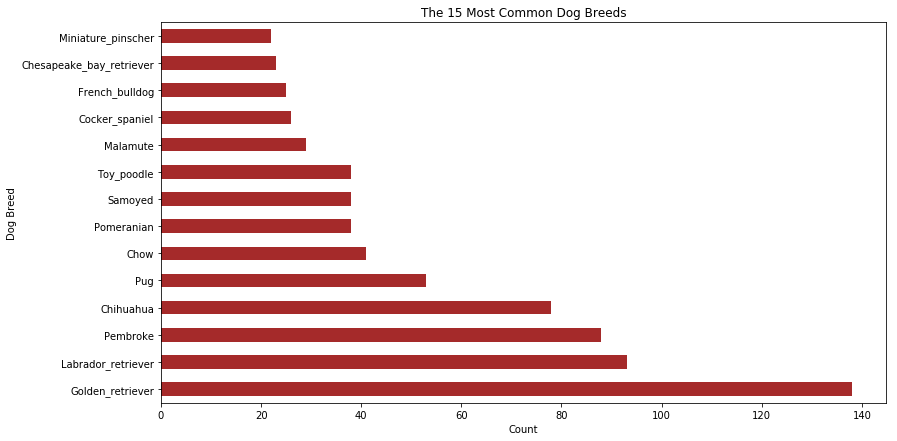

In [172]:
# Most common dog breeds
master_df.p1.value_counts()[:14].plot(kind = 'barh', title = 'The 15 Most Common Dog Breeds', color='brown', figsize=(13,7))
plt.xlabel('Count')
plt.ylabel('Dog Breed')
plt.title('The 15 Most Common Dog Breeds');


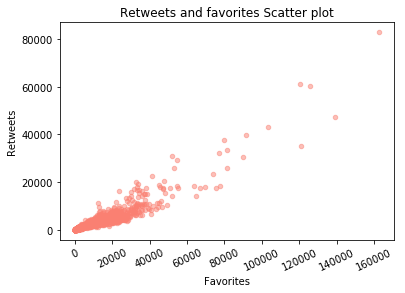

In [183]:
master_df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'salmon');
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.xticks(rotation=25);

In [ ]:
# https://github.com/floreencia/noLogarithms/blob/master/timeline.ipynb

fig, ax = plt.subplots(figsize=(18,2))

for i, r in master_df.iterrows(): # iterate over the rows of the table
    time = r.loc['timestamp']
    ax.vlines(time, 0, 0.5)
    ax.text(time, 0.6, r.loc['retweet_count'], rotation=70,  verticalalignment='bottom')
    
ax.set_xscale("log")
ax.set_ylim(0, 3)
ax.set_xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks([])

ax.set_xlabel('Elapsed time (days)')

Text(0.5, 0, 'Elapsed time (days)')

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


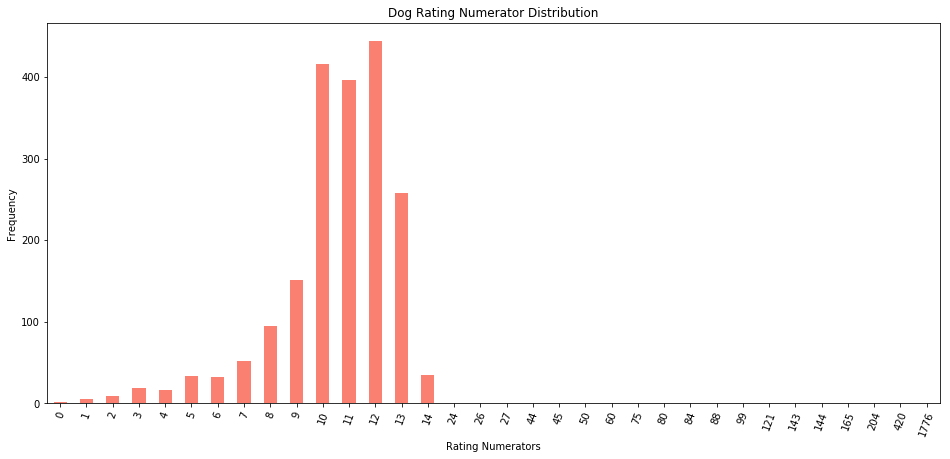

In [165]:
# Most common ratings
master_df.rating_numerator.value_counts().sort_index().plot('bar', figsize=(16,7), color='salmon')
plt.xlabel('Rating Numerators')
plt.ylabel('Frequency')
plt.title('Dog Rating Numerator Distribution')
plt.xticks(rotation=70);

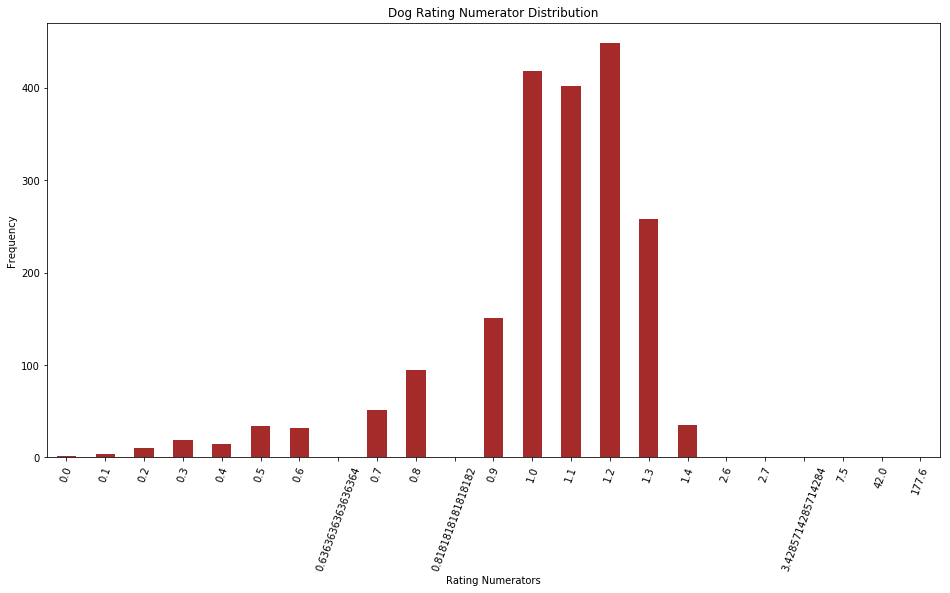

In [180]:
# Most common ratings
master_df.rating.value_counts().sort_index().plot('bar', figsize=(16,8), color='brown')
plt.xlabel('Rating Numerators')
plt.ylabel('Frequency')
plt.title('Dog Rating Numerator Distribution')
plt.xticks(rotation=70);

<a id='conclusion'></a>
## Conclusion

>Create a 300-600 word written report called wrangle_report.pdf or wrangle_report.html that briefly describes your wrangling efforts. This is to be framed as an internal document.

>Create a 250-word-minimum written report called act_report.pdf or act_report.html that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Throughout this notebook, we can see... 

A thorough explanation of .. can be found in `wrangle_report.pdf` and more detail into .. can be found in `act_report.pdf`. 